## Final Project Submission

Please fill out:
* Student name: Ryan McArthur
* Student pace: self paced / part time / full time FULL TIME
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Introduction

Our goal in this investigation is to construct a model that most accurately predicts the sale price of a home in Kings County, Washington. We are completing this investigation in order to better inform prospective home sellers in order for them to obtain the highest possible price for their home. In doing so, we are searching for predictors from our dataset that maximize price. 

First, we will investigate the raw relationships between our predictors by constructing a model using data that has been left alone as much as possible. In this phase, the only tasks to be considered are cleaning data, dealing with categorical values, calculating multicollinearity, and finally modeling the cleaned data. 

Next, in order to most accurately predict our prospective home sellers' property, our model needs to be refined for a highest possible R^2 value. At this point, we will further manipulate our data by removing outliers, performing data normality checks and transformations, and training our model for the best fit. 

We will then construct a model that can be used more simply, for prospective home owners that are looking for an expedient method of finding their homes predicted price. In this stage, columns will be removed from our model that would be difficult for homeowners to find readily. This stage of our investigation focuses on ease of interpretation, allowing our audience to get immediate feedback on their property's value. 


Finally, we will investigate additional considerations that were not considered while constructing our models. We will use exploratory analysis to give our prospective homesellers a better context for their homeselling experience.  

In [19]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

df = pd.read_csv('kc_house_data.csv')

target = 'price'
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Section 0: Data Scope 

In order to have any hope of constructing a model that is interpretable, we must understand where our data comes from, what it measures exactly, and what implications these considerations may have on our investigation. 

The time frame for data collection is between 2014 and 2015. We do not have to worry about historical trends in home prices or inflation due to the small sample time frame. 

Our data is collected from a single county, King County, in Washington State. With this in mind, the columns 'Lat' and 'Long', which describe the property's latitude and longitude, respectively, may not be as informative as we might have first thought, because the variations in the latitude and longitude in a single county is negligible. In this case, zipcode would be a better predictor when looking at the location of the property. 

# Section 1: Cleaning Data

## Handling Datatypes

In [20]:
#checking datatypes of all columns

df.dtypes

#we will need to alter the date and sqft_basement columns

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Date

In [21]:
#slicing the dates to remove forward slashes

sliced_dates = []
for i in df['date']:
    string = ''
    splits = i.split('/')
    string = string.join(splits)
    sliced_dates.append(string)
df['date'] = sliced_dates    
        
#converting from object to datetime

df['date'] = pd.to_datetime(df['date'], format = '%m%d%Y')

df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-11-06
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### Sqft_Basement

In [22]:
# sqft_basement needs to be converted to either a float or int

df.sqft_basement.value_counts(dropna = False)

#sqft_basement values have a possibility of being '?', which we must asssume means there is not a basement.
#We will convert these '?' instances to 0.0

df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

# now we are able to convert the datatype from object to float

df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [23]:
# double checking our datatype conversions

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Handling Missing Values

In [24]:
# Checking all columns for missing values

df.columns[df.isnull().any()]

#our waterfront, view, and yr_renovated columns all have missing values    

Index(['waterfront', 'view', 'yr_renovated'], dtype='object')

### Waterfront

In [25]:
#defining placeholder column

col = 'waterfront'

df[col] = df[col].fillna(0.0)

df[col].value_counts(dropna = False)



0.0    21451
1.0      146
Name: waterfront, dtype: int64

### View

In [26]:
col = 'view'

df[col] = df[col].fillna(0.0)
df[col].value_counts(dropna = False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### Yr_renovated

In [27]:
col = 'yr_renovated'

df[col] = df[col].fillna(0.0)
df[col].value_counts(dropna = False)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

# Section 2: Exploring Data

## Handling Column Context

### Yr_renovated

The column 'yr_renovated' is problematic. Values are recorded as either the year that the home was renovated, or if the home was never renovated, 0.0. The issue with this is that our model would interpret the home as being renovated in the year 0000! We need to alter the data in order for our model to correctly interpret home renovation information. Instead of having a column with the year that a home was renovated, we can instead build a column that records the time since the most recent construction on the home. This should correclty reflect home renovations, while not disproportionately affecting homes that had not been renovated. 

In [28]:
yrs_since_construction = []

#loop to define 'yrs_since_construction', our new column.

for i in range(len(df.yr_built)):

    if df['yr_renovated'][i] > 0.0:
        yrs_since_construction.append(2015 - df['yr_renovated'][i])
    
    else:
        yrs_since_construction.append(2015 - df['yr_built'][i])

        
df['yrs_since_construction'] = yrs_since_construction

#drop the yr_renovated column

df = df.drop('yr_renovated', axis = 1)


## Classifying Categorical Columns

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yrs_since_construction'],
      dtype='object')

In [30]:
# visualizing distributions of our columns

#pd.plotting.scatter_matrix(df, figsize = (20, 20))
#plt.show()

#### Upon inspection, the following columns may be categorical:
- Waterfront
- View
- Condition
- Grade

#### And the following is logically categorical:
- Zipcode


### Verifying Categorical Classification

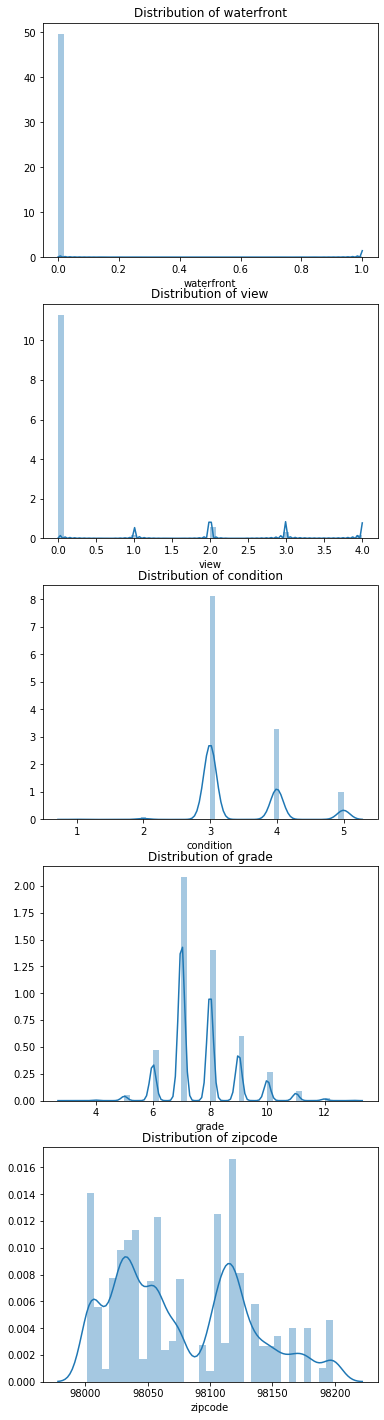

In [31]:
# visualizing distributions of all our possible categorical columns

cat_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (6, 25))

for i, col in enumerate(cat_cols):
    sns.distplot(df[col], ax = axes[i]).set_title('Distribution of '+col)

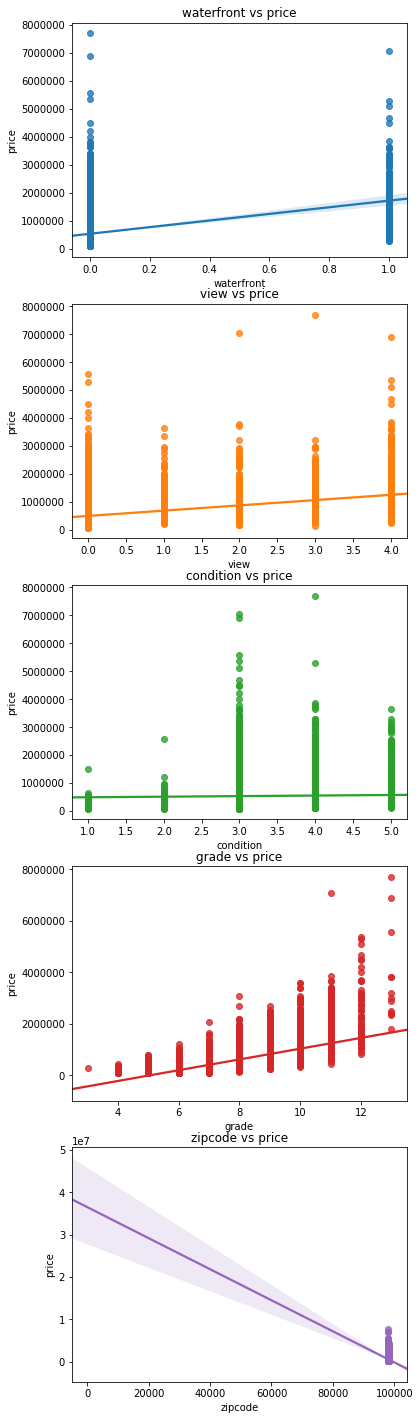

In [32]:
# visualizing the linear relationships of our categorical columns vs price

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (6, 25))

for i, col in enumerate(cat_cols):
    sns.regplot(data = df, ax = axes[i], y = target, x = col).set_title(col + ' vs ' + target)

From these linear visualizations, we can confirm that all of these columns meet the requirements to be considered categorical except for 'grade'. As we will see in the 'Multicollinearity' section of this investigation, 'grade' is multicollinear with other columns, leading us with the options of either making 'grade' a categorical column now, or removing 'grade' in our model altogether. Removing columns is not what we want to do in this preliminary stage of the investigation, so we will make all of the above columns into categorical predictors. 

### Further Datatype Handling

To convert these columns to categorical predictors, we need to change the datatypes from floats or integers to strings. 

In [33]:
# we do not need to alter 'waterfront' because this column is already recorded as either 0 or 1, which is the end goal
# of one-hot-encoding. 

cat_cols = ['view', 'condition', 'grade', 'zipcode']
df_tb_encoded = df.copy()
for i in cat_cols:
    df_tb_encoded[i] = df_tb_encoded[i].astype(str)

df_ohe = pd.get_dummies(df_tb_encoded, columns = cat_cols)
df_ohe



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,1530,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,2310,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,1020,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,2015-11-06,400000.0,3,2.50,1600,2388,2.0,0.0,1600,...,0,0,0,0,0,0,0,0,0,0


In [34]:
def fix_ohe_colnames(df_ohe):
    df_ohe = df_ohe.copy()
    new_col_names = list(map(lambda x: x.replace('.','').replace(' ',''),df_ohe.columns))
    new_col_names = list(map(lambda x: x.replace('(','').replace(')',''),new_col_names))
    new_col_names= list(map(lambda x: x.replace('&',''),new_col_names))
    df_ohe.columns = new_col_names
    return df_ohe

df_ohe = fix_ohe_colnames(df_ohe)

## Multicollinearity Checks

In [35]:
# finding correlations that are greater than 0.70

abs(df.corr()>0.70)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_construction
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [36]:
# in order to return list of multicollinear columns:

df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns = ['level_1', 'level_0'], inplace = True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace = True)

# constructing the correlation dataframe
df_corr[(df_corr.cc>0.70) & (df_corr.cc<1)]

,cc
pairs,
"(yrs_since_construction, yr_built)",0.926406
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(grade, sqft_living15)",0.713867


'Grade' was classified as a categorical predictor based off of its correlation with other predictors. If we had kept this column as numerical, we would have had to drop this column as well. 

From these correlations, we will be removing the following columns for our initial model: 
- yrs_since_construction
- sqft_above
- sqft_living15
- sqft_lot15


# Section 3: Raw Modeling

## Model Construction

In [37]:
def model_maker(df_ohe, target = 'price', drop_cols=[]):
    df_mod = df_ohe.copy()
    
    for column in drop_cols:
        if column in df_mod.columns:
            df_mod.drop(columns = column, inplace = True)
    
    features = '+'.join(df_mod.drop(columns = target).columns)
    formula = target + '~' + features
    
    model = smf.ols(formula, df_mod).fit()
    return model

In [38]:
def model_measures(model, y_true = None):
    
    display(model.summary())
    
    residuals = model.resid
    
    fig, ax = plt.subplots(ncols = 2, figsize = (10, 5))
    
    sm.graphics.qqplot(residuals, stats.distributions.norm, fit = True
                      , line = '45', ax = ax[0])
    ax[0].set_title('QQ Plot')
    
    if y_true == None:
        xs = np.linspace(0, len(residuals), len(residuals))
        xlabel = 'Row in Dataset'
        font_dict = dict(rotation = 0)
    else:
        xs = y_true
        xlabel = 'True Target Values'
        x_rot = 0
        font_dict = dict(rotation = 45, ha = 'right')
    ax[1].scatter(x = xs, y = residuals, alpha = 0.15)
    ax[1].axhline(0, color = 'k', zorder = 1)
    
    ax[1].set(ylabel = 'Residuals', title = "Homeoskedasticity Measure",
             xlabel = xlabel)
    
    plt.tight_layout()
    plt.show()

In [39]:
#we need to be sure to exclude both the 'date' column and 'id' column
df_ohe = df_ohe.drop('date', axis = 1)

In [40]:
df_ohe = df_ohe.drop('id', axis = 1)

In [41]:
raw_model = model_maker(df_ohe, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])

Intercept       -2.223378e+07
bedrooms        -1.313209e+04
bathrooms        2.705057e+04
sqft_living      1.695632e+02
sqft_lot         1.848013e-01
                     ...     
zipcode_98177   -3.754018e+05
zipcode_98178   -4.848644e+05
zipcode_98188   -4.771077e+05
zipcode_98198   -5.026570e+05
zipcode_98199   -1.844270e+05
Length: 102, dtype: float64

## Model Evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1114.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:29   Log-Likelihood:            -2.8799e+05
No. Observations:               21597   AIC:                         5.762e+05
Df Residuals:                   21499   BIC:                         5.770e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.223e+07   3.81e+06     -5.831      0.000   -2.97e+07   -1.48e+07
bedrooms      -1.313e+04   1464.421     -8.967      0.000    -1.6e+04   -1.03e+04
bathrooms      2.705e+04   2448.381     11.048      0.000    2.23e+04    3.18e+04
sqft_living     169.5632      2.729     62.137      0.000     164.214     174.912
sqft_lot          0.1848      0.027      6.765      0.000       0.131       0.238
floors        -2.638e+04   2953.070     -8.933      0.000   -3.22e+04   -2.06e+04
waterfront     5.981e+05   1.55e+04     38.665      0.000    5.68e+05    6.28e+05
sqft_basement   -50.1475      3.384    -14.818      0.000     -56.781     -43.514
yr_built       -510.4465     58.463     -8.731      0.000    -625.038    -395.855
lat            2.262e+05   5.92e+04      3.819      0.000     1.1e+05    3.42e+05
long          -1.991e+05   4.25e+04     -4.683      0.000   -2.82e+05   -1.16e+05
view_00       -4.572e+06   7.63e+05     -5.995      0.000   -6.07e+06   -3.08e+06
view_10       -4.482e+06   7.63e+05     -5.876      0.000   -5.98e+06   -2.99e+06
view_20       -4.501e+06   7.63e+05     -5.902      0.000      -6e+06   -3.01e+06
view_30       -4.414e+06   7.63e+05     -5.788      0.000   -5.91e+06   -2.92e+06
view_40       -4.266e+06   7.63e+05     -5.593      0.000   -5.76e+06   -2.77e+06
condition_1   -4.541e+06   7.63e+05     -5.952      0.000   -6.04e+06   -3.05e+06
condition_2   -4.454e+06   7.63e+05     -5.840      0.000   -5.95e+06   -2.96e+06
condition_3    -4.44e+06   7.63e+05     -5.822      0.000   -5.94e+06   -2.95e+06
condition_4    -4.42e+06   7.63e+05     -5.796      0.000   -5.91e+06   -2.93e+06
condition_5   -4.378e+06   7.63e+05     -5.741      0.000   -5.87e+06   -2.88e+06
grade_10      -2.132e+06   3.47e+05     -6.143      0.000   -2.81e+06   -1.45e+06
grade_11      -1.934e+06   3.47e+05     -5.569      0.000   -2.62e+06   -1.25e+06
grade_12      -1.527e+06   3.47e+05     -4.398      0.000   -2.21e+06   -8.47e+05
grade_13      -4.277e+05   3.49e+05     -1.224      0.221   -1.11e+06    2.57e+05
grade_3       -2.214e+06   3.73e+05     -5.940      0.000   -2.94e+06   -1.48e+06
grade_4       -2.324e+06   3.48e+05     -6.685      0.000   -3.01e+06   -1.64e+06
grade_5       -2.364e+06   3.47e+05     -6.820      0.000   -3.04e+06   -1.68e+06
grade_6       -2.365e+06   3.47e+05     -6.818      0.000   -3.05e+06   -1.69e+06
grade_7       -2.359e+06   3.47e+05     -6.798      0.000   -3.04e+06   -1.68e+06
grade_8       -2.332e+06   3.47e+05     -6.718      0.000   -3.01e+06   -1.65e+06
grade_9       -2.254e+06   3.47e+05     -6.494      0.000   -2.93e+06   -1.57e+06
zipcode_98001 -4.725e+05   5.31e+04     -8.893      0.000   -5.77e+05   -3.68e+05
zipcode_98002 -4.569e+05   5.13e+04     -8.906      0.000   -5.58e+05   -3.56e+05
zipcode_98003 -4.881e+05   5.49e+04     -8.887   

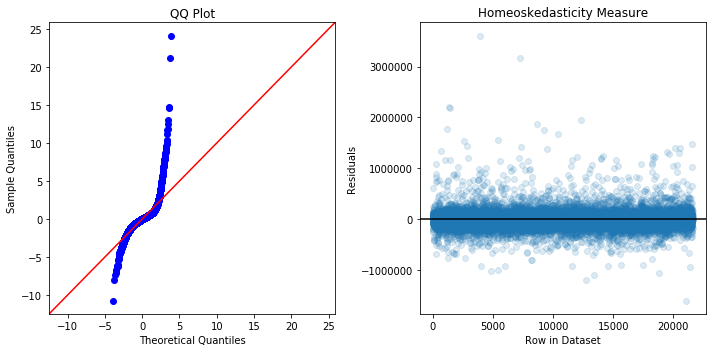

In [42]:
model_measures(raw_model)

#### Interpretations
None of our P-values are greater than 0.05, so we do not need to drop any of the predictors used in the model. "}

For a raw model, an R^2 value of 0.83 is fantastic! We will be refining and perfecting our model to get to an even better value for our R^2.

From the above visualizations of our model performance, we can see that while we have relative homoskedasticity, our QQ plot leaves much to be desired. We can see that there are many outliers towards the upper bounds, so dealing with these outliers will give us a tighter model. 

# Section 4: Refined Modeling

## Outlier Removal

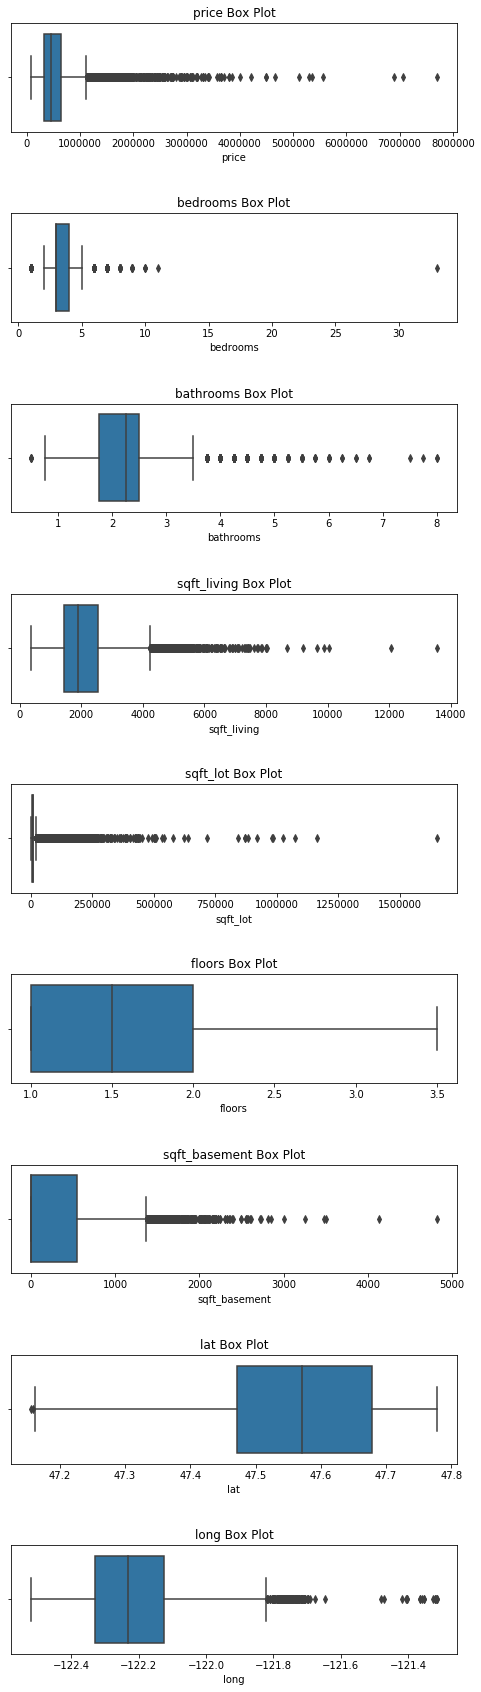

In [43]:
#defining columns that could have outliers, all that are not categorical
outlier_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'floors', 'sqft_basement', 'lat', 'long']
fig, axes = plt.subplots(nrows = 9, ncols = 1, figsize = (8, 30))

for i, col in enumerate(outlier_cols):
        sns.boxplot(df_ohe[col], ax = axes[i]).set_title(col + ' Box Plot')
plt.subplots_adjust(hspace = 0.75)

From these visualizations, the following columns definitely have outliers:
- Price
- Bedrooms
- Bathrooms
- Sqft_living
- Sqft_lot
- Sqft_basement

    

We will keep latitude and longitude as they are, because having outliers in these columns is acceptable, since someone may have a property in the less populated parts of kings county, and this may affect home prices drastically. 

### Using Z-Scores to Remove Outliers

In [44]:
# first to define a function that will find outliers in a column, given
# a column and a threshold to eliminate outliers on. 

def z_score_outliers(col, threshold = 3):
    
    z_scores = np.abs(stats.zscore(df_ohe[col]))
    z_scores = pd.Series(z_scores, index = df_ohe[col].index)
    
    indexed_outliers = z_scores > threshold
    
    return indexed_outliers
    

In [45]:
to_be_cleaned = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'
                , 'sqft_basement']

#retreiving outliers for all of our columns

price_outliers = z_score_outliers('price')
bedrooms_outliers = z_score_outliers('bedrooms')
bathrooms_outliers = z_score_outliers('bathrooms')
sqft_living_outliers = z_score_outliers('sqft_living')
sqft_lot_outliers = z_score_outliers('sqft_lot')
sqft_basement_outliers = z_score_outliers('sqft_basement')


In [46]:
#making a new dataframe to remove outliers from so that we may compare
#removal methods later

df_z_cleaned = df_ohe.copy()

#removing each column's outliers one by one

price_removed = df_z_cleaned[~price_outliers]
bedrooms_removed = price_removed[~bedrooms_outliers]
bathrooms_removed = bedrooms_removed[~bathrooms_outliers]
sqft_living_removed = bathrooms_removed[~sqft_living_outliers]
sqft_lot_removed = sqft_living_removed[~sqft_lot_outliers]
sqft_basement_removed = sqft_lot_removed[~sqft_basement_outliers]

#renaming our fully cleaned dataframe

df_z_cleaned = sqft_basement_removed

diff = len(df_ohe) - len(df_z_cleaned)
diff / len(df_ohe)





/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindex

0.0502847617724684

By using the z-score method of outlier removal, we have removed 1086 rows from our dataset. 

### Using IQR to remove outliers

In [47]:
#defining a function to identify outliers, which takes a column of data

def iqr_outliers(col):
    
    details = df_ohe[col].describe()
    
    inter = (details['75%']) - (details['25%'])
    threshold = 1.5 * inter
    
    indexed_outliers = ((df_ohe[col] < details['25%'] - threshold) | 
    (df_ohe[col] > details['75%'] + threshold))
    
    return indexed_outliers

In [48]:
price_outliers = iqr_outliers('price')
bedrooms_outliers = iqr_outliers('bedrooms')
bathrooms_outliers = iqr_outliers('bathrooms')
sqft_living_outliers = iqr_outliers('sqft_living')
sqft_lot_outliers = iqr_outliers('sqft_lot')
sqft_basement_outliers = iqr_outliers('sqft_basement')

In [49]:
#making a new dataframe to remove outliers from so that we may compare
#removal methods later

df_iqr_cleaned = df_ohe.copy()

#removing each column's outliers one by one

price_removed = df_z_cleaned[~price_outliers]
bedrooms_removed = price_removed[~bedrooms_outliers]
bathrooms_removed = bedrooms_removed[~bathrooms_outliers]
sqft_living_removed = bathrooms_removed[~sqft_living_outliers]
sqft_lot_removed = sqft_living_removed[~sqft_lot_outliers]
sqft_basement_removed = sqft_lot_removed[~sqft_basement_outliers]

#renaming our fully cleaned dataframe

df_iqr_cleaned = sqft_basement_removed

print(len(df_ohe) - len(df_iqr_cleaned))


4084


/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/LilBro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame 

By using the IQR method of outlier removal, we have removed 4084 rows from our data! This is almost four times as much as using the z-score method. 

### Comparing Outlier Removal Methods

In [50]:
#using the same model as used in our raw model, only now without outliers.
#we keep the dropped columns identified in our multicollinearity check

z_model = model_maker(df_ohe = df_z_cleaned, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])
iqr_model = model_maker(df_ohe = df_iqr_cleaned, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1113.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:32   Log-Likelihood:            -2.6531e+05
No. Observations:               20511   AIC:                         5.308e+05
Df Residuals:                   20414   BIC:                         5.316e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.304e+07   2.68e+06     -4.871      0.000   -1.83e+07   -7.79e+06
bedrooms      -3283.6875   1103.263     -2.976      0.003   -5446.171   -1121.204
bathrooms      2.341e+04   1776.901     13.172      0.000    1.99e+04    2.69e+04
sqft_living     132.2905      2.051     64.489      0.000     128.270     136.311
sqft_lot          0.6040      0.062      9.773      0.000       0.483       0.725
floors        -2.013e+04   2072.558     -9.715      0.000   -2.42e+04   -1.61e+04
waterfront     2.345e+05   1.41e+04     16.675      0.000    2.07e+05    2.62e+05
sqft_basement   -43.9774      2.529    -17.388      0.000     -48.935     -39.020
yr_built       -561.8724     40.779    -13.778      0.000    -641.803    -481.942
lat            1.189e+05   4.15e+04      2.866      0.004    3.76e+04       2e+05
long          -1.278e+05      3e+04     -4.253      0.000   -1.87e+05   -6.89e+04
view_00       -2.713e+06   5.35e+05     -5.068      0.000   -3.76e+06   -1.66e+06
view_10       -2.636e+06   5.35e+05     -4.922      0.000   -3.69e+06   -1.59e+06
view_20        -2.64e+06   5.35e+05     -4.931      0.000   -3.69e+06   -1.59e+06
view_30       -2.574e+06   5.35e+05     -4.808      0.000   -3.62e+06   -1.52e+06
view_40       -2.477e+06   5.36e+05     -4.626      0.000   -3.53e+06   -1.43e+06
condition_1   -2.681e+06   5.36e+05     -5.004      0.000   -3.73e+06   -1.63e+06
condition_2   -2.625e+06   5.35e+05     -4.903      0.000   -3.68e+06   -1.58e+06
condition_3   -2.601e+06   5.35e+05     -4.858      0.000   -3.65e+06   -1.55e+06
condition_4   -2.584e+06   5.35e+05     -4.827      0.000   -3.63e+06   -1.53e+06
condition_5   -2.548e+06   5.35e+05     -4.760      0.000    -3.6e+06    -1.5e+06
grade_10      -1.217e+06   2.68e+05     -4.542      0.000   -1.74e+06   -6.92e+05
grade_11       -1.11e+06   2.68e+05     -4.140      0.000   -1.64e+06   -5.84e+05
grade_12      -9.409e+05   2.69e+05     -3.502      0.000   -1.47e+06   -4.14e+05
grade_13       -9.48e-08   1.95e-08     -4.858      0.000   -1.33e-07   -5.66e-08
grade_3       -1.309e+06   2.83e+05     -4.627      0.000   -1.86e+06   -7.54e+05
grade_4       -1.431e+06   2.68e+05     -5.334      0.000   -1.96e+06   -9.05e+05
grade_5        -1.46e+06   2.68e+05     -5.455      0.000   -1.98e+06   -9.35e+05
grade_6       -1.453e+06   2.68e+05     -5.425      0.000   -1.98e+06   -9.28e+05
grade_7       -1.432e+06   2.68e+05     -5.343      0.000   -1.96e+06   -9.07e+05
grade_8       -1.388e+06   2.68e+05     -5.181      0.000   -1.91e+06   -8.63e+05
grade_9       -1.299e+06   2.68e+05     -4.845      0.000   -1.82e+06   -7.73e+05
zipcode_98001 -3.549e+05   3.73e+04     -9.508      0.000   -4.28e+05   -2.82e+05
zipcode_98002 -3.408e+05    3.6e+04     -9.475      0.000   -4.11e+05    -2.7e+05
zipcode_98003   -3.6e+05   3.86e+04     -9.339   

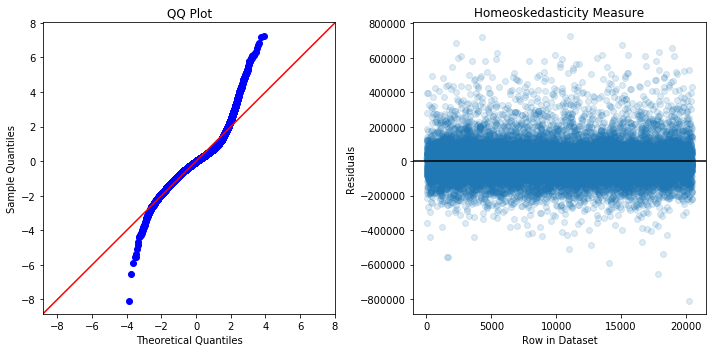

In [51]:
model_measures(z_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     966.5
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:32   Log-Likelihood:            -2.2245e+05
No. Observations:               17513   AIC:                         4.451e+05
Df Residuals:                   17418   BIC:                         4.458e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.953e+06   2.59e+06     -1.528      0.127   -9.02e+06    1.12e+06
bedrooms      -1926.0872   1031.596     -1.867      0.062   -3948.119      95.945
bathrooms      1.747e+04   1593.775     10.959      0.000    1.43e+04    2.06e+04
sqft_living     126.0531      1.884     66.899      0.000     122.360     129.746
sqft_lot          1.2331      0.247      4.996      0.000       0.749       1.717
floors        -1.627e+04   1868.798     -8.708      0.000   -1.99e+04   -1.26e+04
waterfront     1.814e+05   1.98e+04      9.167      0.000    1.43e+05     2.2e+05
sqft_basement   -43.7636      2.365    -18.503      0.000     -48.400     -39.127
yr_built       -572.6962     36.036    -15.892      0.000    -643.330    -502.062
lat             552.9045   3.86e+04      0.014      0.989   -7.51e+04    7.62e+04
long          -6.138e+04   2.98e+04     -2.059      0.040    -1.2e+05   -2940.725
view_00        -8.75e+05   5.17e+05     -1.691      0.091   -1.89e+06    1.39e+05
view_10       -8.106e+05   5.17e+05     -1.567      0.117   -1.82e+06    2.04e+05
view_20       -8.111e+05   5.17e+05     -1.568      0.117   -1.83e+06    2.03e+05
view_30       -7.789e+05   5.17e+05     -1.505      0.132   -1.79e+06    2.35e+05
view_40       -6.773e+05   5.17e+05     -1.309      0.191   -1.69e+06    3.37e+05
condition_1   -8.839e+05   5.18e+05     -1.708      0.088    -1.9e+06    1.31e+05
condition_2   -8.125e+05   5.18e+05     -1.570      0.116   -1.83e+06    2.02e+05
condition_3   -7.729e+05   5.17e+05     -1.494      0.135   -1.79e+06    2.41e+05
condition_4   -7.569e+05   5.17e+05     -1.463      0.143   -1.77e+06    2.57e+05
condition_5   -7.267e+05   5.17e+05     -1.405      0.160   -1.74e+06    2.87e+05
grade_10      -3.941e+05   3.24e+05     -1.218      0.223   -1.03e+06     2.4e+05
grade_11       -3.05e+05   3.24e+05     -0.942      0.346    -9.4e+05     3.3e+05
grade_12       1.977e-08   1.28e-08      1.539      0.124   -5.41e-09     4.5e-08
grade_13        -9.8e-09    6.8e-09     -1.441      0.150   -2.31e-08    3.53e-09
grade_3       -5.604e-08   3.69e-08     -1.519      0.129   -1.28e-07    1.63e-08
grade_4       -5.968e+05   3.24e+05     -1.843      0.065   -1.23e+06    3.79e+04
grade_5       -5.883e+05   3.23e+05     -1.820      0.069   -1.22e+06    4.52e+04
grade_6       -5.785e+05   3.23e+05     -1.789      0.074   -1.21e+06    5.54e+04
grade_7        -5.51e+05   3.23e+05     -1.704      0.088   -1.18e+06     8.3e+04
grade_8       -5.072e+05   3.23e+05     -1.568      0.117   -1.14e+06    1.27e+05
grade_9        -4.32e+05   3.24e+05     -1.335      0.182   -1.07e+06    2.02e+05
zipcode_98001 -2.409e+05   3.63e+04     -6.638      0.000   -3.12e+05    -1.7e+05
zipcode_98002 -2.327e+05   3.48e+04     -6.677      0.000   -3.01e+05   -1.64e+05
zipcode_98003 -2.443e+05   3.75e+04     -6.519   

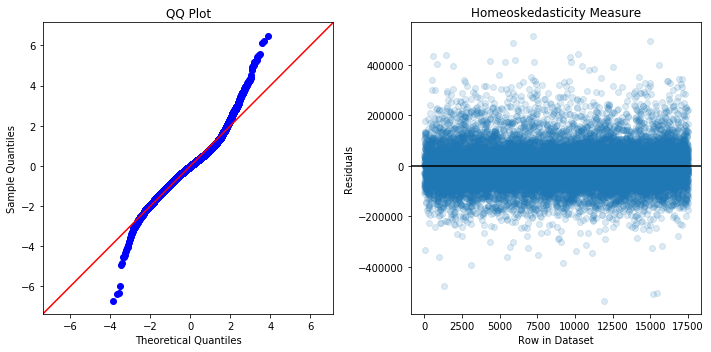

In [52]:
model_measures(iqr_model)

#### Observations
- While IQR outlier removal handles over 4,000 rows of data, z_score removal handles only over 1,000. We would expect that with more data removal, the R^2 value would increase, as the datasets move to more normal distributions. However, our z-score cleaned data acheived a higher R^2 than the IQR cleaned data. Therefore, we will be continuing our refinement with df_z_cleaned, because this has both a superior R^2 and contains more data than df_iqr_cleaned.

In [53]:
df_clean = df_z_cleaned

## Normality Transformations

The most common type of normality transformation is a logarithmic transformation, which normalizes data by reducing to the logarithmic scale. However, there are other methods to acheive normality in our data that we can use, such as the Box Cox transformation. This method of transformation is automated through scipy.stats, and documentation can be found here. We will be using both logarithmic and Box Cox transformations on our data columns and deciding which lend theirselves better to our model. 

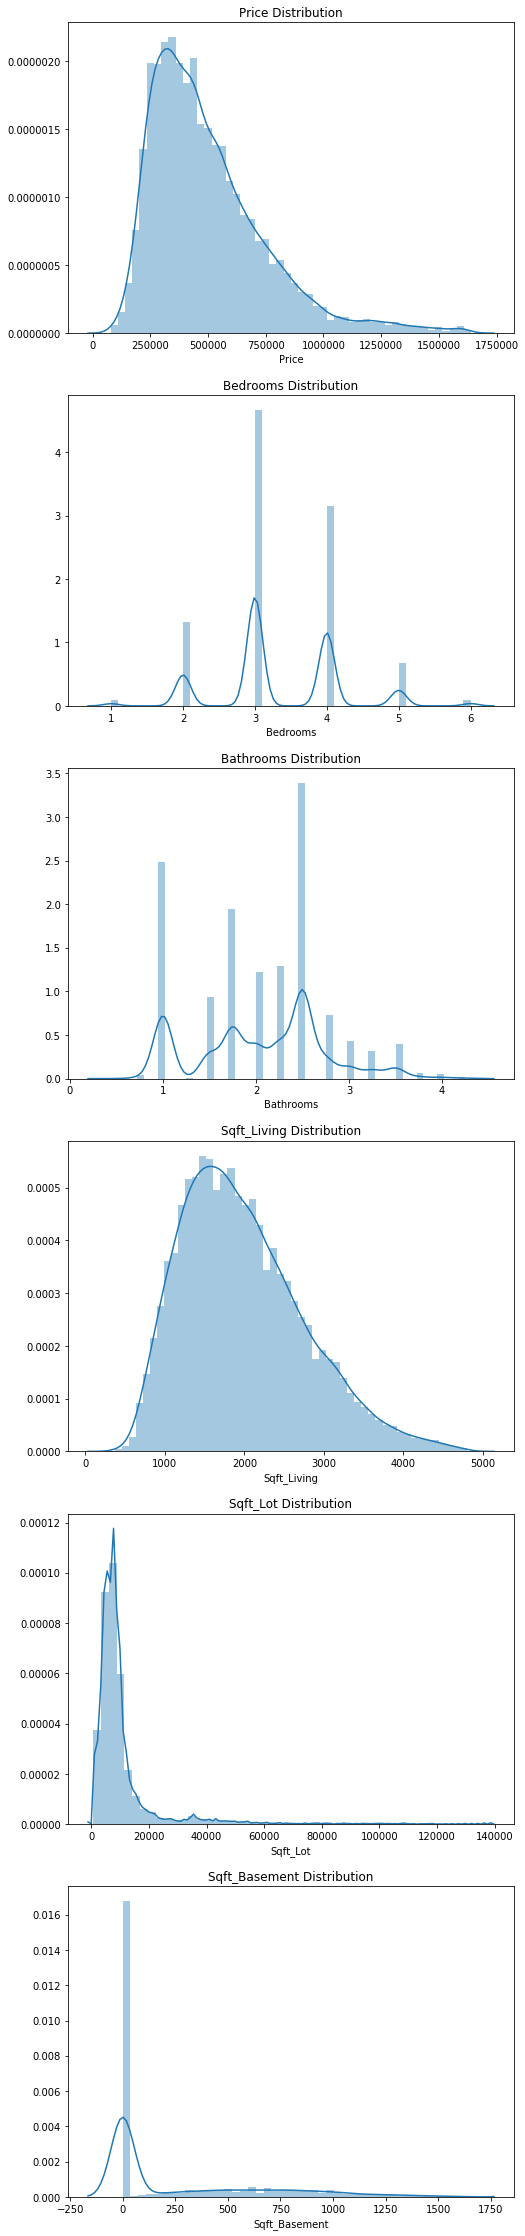

In [54]:
# First, we need to visualize the distributions of our columns. 


fig, axes = plt.subplots(ncols = 1, nrows = len(to_be_cleaned), figsize = (8, 40))
for i, col in enumerate(to_be_cleaned):
    a = sns.distplot(df_clean[col], ax = axes[i])
    a.set_xlabel(col.title())   
    a.set_title((str(col).title()) + ' Distribution')

The following columns follow a relatively normal distribution and will not be transformed for normality:
- Bedrooms



The following are skewed and will be transformed using both a logarithmic transformation and Box-Cox transformation:
- Price
- Sqft_living
- sqft_lot

The following do not follow a normal distribution, and should therefore undergo a Box-Cox transformation:
- Bathrooms
- Sqft_basement


### Performing Logarithmic Transformation


In [55]:
log_cols = ['price', 'sqft_living', 'sqft_lot']

for col in log_cols:
    df_logged = df_clean.copy()
    df_logged[col] = df_logged[col].map(lambda x: np.log(x)) 

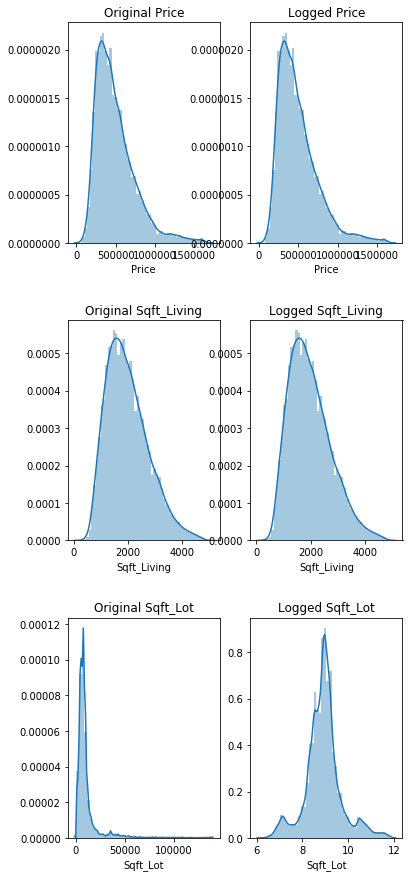

In [56]:
fig, axes = plt.subplots(nrows = len(log_cols), ncols = 2, figsize = (6, 15))
for i, col in enumerate(log_cols):
    a = sns.distplot(df_clean[col], ax = axes[i][0])
    b = sns.distplot(df_logged[col], ax = axes[i][1])
    a.set_title('Original '+ col.title())
    b.set_title('Logged '+ col.title())
    a.set_xlabel(col.title())
    b.set_xlabel(col.title())
    plt.subplots_adjust(hspace = 0.35)

The most successful application of our log transformation was with our 'sqft_lot' column, which has drastically changed for the better in regard to normality. Our other transformed columns have also improved, but are still experiencing skewness. We will see if the Box-Cox transformation addresses this weakness of a log transformation. 

### Box-Cox Transformation

It's important to note that box cox transformations cannot be used on values less than or equal to zero. Because of this, we must exclude our 'sqft_basement' column from this transformation due to the high number of occurrences of zero. 

In [57]:
#import the Box-Cox function

from numpy import exp
from scipy.stats import boxcox


bxcx_cols = ['price', 'sqft_living', 'sqft_lot', 'bathrooms']
df_boxed = df_clean.copy()

for col in bxcx_cols:
    
    #apply our Box-Cox transformation
    
    df_boxed[col] = boxcox(df_boxed[col], 0)

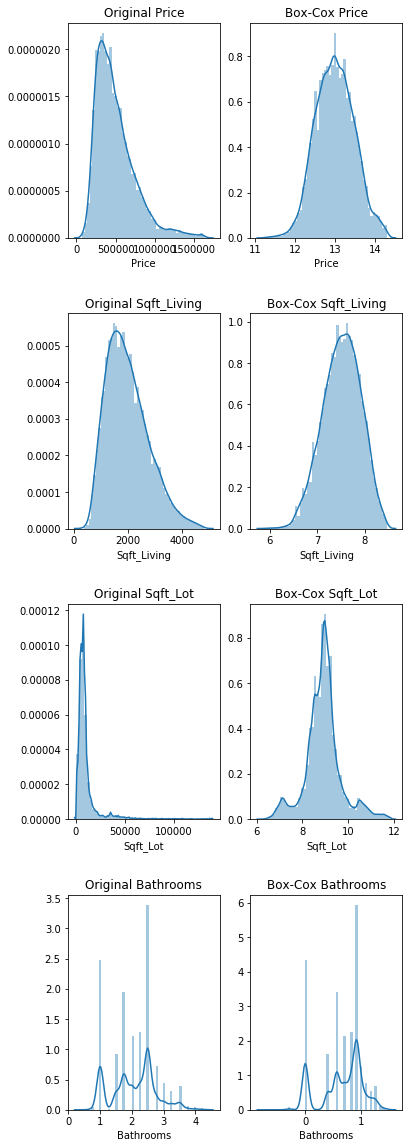

In [58]:
fig, axes = plt.subplots(ncols = 2, nrows = len(bxcx_cols), figsize = (6, 20))
for i, col in enumerate(bxcx_cols):
    a = sns.distplot(df_clean[col], ax = axes[i][0])
    b = sns.distplot(df_boxed[col], ax = axes[i][1])
    a.set_title("Original " + col.title())
    b.set_title('Box-Cox ' + col.title())
    a.set_xlabel(col.title())
    b.set_xlabel(col.title())
    plt.subplots_adjust(hspace = 0.35)

By using the Box-Cox transformation method, our distributions have come out with a more normal distribution than when we used a logarithmic transformation. This is because the box-cox transformation automates selecting a transformation that best approaches normality in our data. This is why the logarithmic transformation and Box-Cox transformation on 'sqft_lot' are identical; both methods were the same. It's important to note that the transformations on 'bathrooms' were less successful, most likely due to the low amount of possibile records of this column, limiting how well we may transform on this small scale. 

In [59]:
df_transformed = df_boxed

## Model Construction

In [60]:
transformed_model = model_maker(df_transformed, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])

## Model Evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1340.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:37   Log-Likelihood:                 6457.9
No. Observations:               20511   AIC:                        -1.272e+04
Df Residuals:                   20414   BIC:                        -1.195e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -43.9190      4.717     -9.310      0.000     -53.165     -34.673
bedrooms         -0.0101      0.002     -5.161      0.000      -0.014      -0.006
bathrooms         0.0636      0.006     10.830      0.000       0.052       0.075
sqft_living       0.4849      0.007     66.089      0.000       0.471       0.499
sqft_lot          0.0584      0.002     23.625      0.000       0.054       0.063
floors           -0.0158      0.004     -4.161      0.000      -0.023      -0.008
waterfront        0.3991      0.025     16.114      0.000       0.351       0.448
sqft_basement -7.835e-05   4.48e-06    -17.472      0.000   -8.71e-05   -6.96e-05
yr_built         -0.0005   7.41e-05     -6.105      0.000      -0.001      -0.000
lat               0.4686      0.073      6.415      0.000       0.325       0.612
long             -0.4433      0.053     -8.380      0.000      -0.547      -0.340
view_00          -8.9359      0.943     -9.472      0.000     -10.785      -7.087
view_10          -8.8059      0.944     -9.333      0.000     -10.655      -6.956
view_20          -8.8110      0.943     -9.339      0.000     -10.660      -6.962
view_30          -8.7364      0.943     -9.260      0.000     -10.586      -6.887
view_40          -8.6298      0.944     -9.145      0.000     -10.480      -6.780
condition_1      -8.9863      0.944     -9.519      0.000     -10.837      -7.136
condition_2      -8.8625      0.944     -9.392      0.000     -10.712      -7.013
condition_3      -8.7307      0.943     -9.254      0.000     -10.580      -6.881
condition_4      -8.6993      0.943     -9.221      0.000     -10.549      -6.850
condition_5      -8.6402      0.943     -9.158      0.000     -10.489      -6.791
grade_10         -4.2596      0.472     -9.018      0.000      -5.185      -3.334
grade_11         -4.1519      0.472     -8.788      0.000      -5.078      -3.226
grade_12         -4.0753      0.473     -8.608      0.000      -5.003      -3.147
grade_13        2.04e-13    2.2e-14      9.293      0.000    1.61e-13    2.47e-13
grade_3          -4.0654      0.498     -8.156      0.000      -5.042      -3.088
grade_4          -4.6467      0.473     -9.826      0.000      -5.574      -3.720
grade_5          -4.7049      0.472     -9.974      0.000      -5.629      -3.780
grade_6          -4.6421      0.472     -9.835      0.000      -5.567      -3.717
grade_7          -4.5679      0.472     -9.675      0.000      -5.493      -3.643
grade_8          -4.4682      0.472     -9.462      0.000      -5.394      -3.543
grade_9          -4.3370      0.472     -9.184      0.000      -5.263      -3.411
zipcode_98001    -1.0260      0.066    -15.577      0.000      -1.155      -0.897
zipcode_98002    -1.0158      0.063    -16.022      0.000      -1.140      -0.892
zipcode_98003    -1.0239      0.068    -15.055   

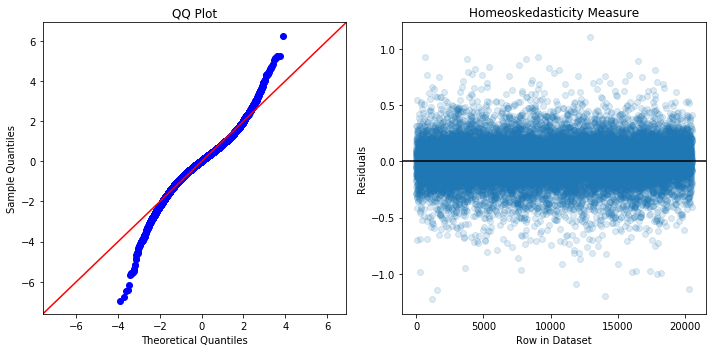

In [61]:
model_measures(transformed_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1113.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:37   Log-Likelihood:            -2.6531e+05
No. Observations:               20511   AIC:                         5.308e+05
Df Residuals:                   20414   BIC:                         5.316e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.304e+07   2.68e+06     -4.871      0.000   -1.83e+07   -7.79e+06
bedrooms      -3283.6875   1103.263     -2.976      0.003   -5446.171   -1121.204
bathrooms      2.341e+04   1776.901     13.172      0.000    1.99e+04    2.69e+04
sqft_living     132.2905      2.051     64.489      0.000     128.270     136.311
sqft_lot          0.6040      0.062      9.773      0.000       0.483       0.725
floors        -2.013e+04   2072.558     -9.715      0.000   -2.42e+04   -1.61e+04
waterfront     2.345e+05   1.41e+04     16.675      0.000    2.07e+05    2.62e+05
sqft_basement   -43.9774      2.529    -17.388      0.000     -48.935     -39.020
yr_built       -561.8724     40.779    -13.778      0.000    -641.803    -481.942
lat            1.189e+05   4.15e+04      2.866      0.004    3.76e+04       2e+05
long          -1.278e+05      3e+04     -4.253      0.000   -1.87e+05   -6.89e+04
view_00       -2.713e+06   5.35e+05     -5.068      0.000   -3.76e+06   -1.66e+06
view_10       -2.636e+06   5.35e+05     -4.922      0.000   -3.69e+06   -1.59e+06
view_20        -2.64e+06   5.35e+05     -4.931      0.000   -3.69e+06   -1.59e+06
view_30       -2.574e+06   5.35e+05     -4.808      0.000   -3.62e+06   -1.52e+06
view_40       -2.477e+06   5.36e+05     -4.626      0.000   -3.53e+06   -1.43e+06
condition_1   -2.681e+06   5.36e+05     -5.004      0.000   -3.73e+06   -1.63e+06
condition_2   -2.625e+06   5.35e+05     -4.903      0.000   -3.68e+06   -1.58e+06
condition_3   -2.601e+06   5.35e+05     -4.858      0.000   -3.65e+06   -1.55e+06
condition_4   -2.584e+06   5.35e+05     -4.827      0.000   -3.63e+06   -1.53e+06
condition_5   -2.548e+06   5.35e+05     -4.760      0.000    -3.6e+06    -1.5e+06
grade_10      -1.217e+06   2.68e+05     -4.542      0.000   -1.74e+06   -6.92e+05
grade_11       -1.11e+06   2.68e+05     -4.140      0.000   -1.64e+06   -5.84e+05
grade_12      -9.409e+05   2.69e+05     -3.502      0.000   -1.47e+06   -4.14e+05
grade_13       -9.48e-08   1.95e-08     -4.858      0.000   -1.33e-07   -5.66e-08
grade_3       -1.309e+06   2.83e+05     -4.627      0.000   -1.86e+06   -7.54e+05
grade_4       -1.431e+06   2.68e+05     -5.334      0.000   -1.96e+06   -9.05e+05
grade_5        -1.46e+06   2.68e+05     -5.455      0.000   -1.98e+06   -9.35e+05
grade_6       -1.453e+06   2.68e+05     -5.425      0.000   -1.98e+06   -9.28e+05
grade_7       -1.432e+06   2.68e+05     -5.343      0.000   -1.96e+06   -9.07e+05
grade_8       -1.388e+06   2.68e+05     -5.181      0.000   -1.91e+06   -8.63e+05
grade_9       -1.299e+06   2.68e+05     -4.845      0.000   -1.82e+06   -7.73e+05
zipcode_98001 -3.549e+05   3.73e+04     -9.508      0.000   -4.28e+05   -2.82e+05
zipcode_98002 -3.408e+05    3.6e+04     -9.475      0.000   -4.11e+05    -2.7e+05
zipcode_98003   -3.6e+05   3.86e+04     -9.339   

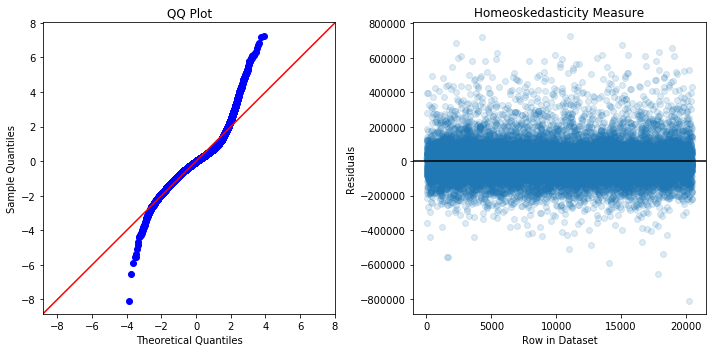

In [62]:
model_measures(z_model)

#### Interpretations
- Our transformed model has come a long way from our raw model, as visualized by these comparisons. Homoskedasticity remains relatively uniform, and our QQ plot is suggesting more normal data. 
- With an R^2 of 86%, we are content with leaving this model as is for presentation. Any further manipulation of data would hinder interpretability even more than we already have. 


## Model Training

In [63]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import r2_score

In [64]:
df_train, df_test = train_test_split(df_transformed)

trained_model = model_maker(df_train, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:20:39   Log-Likelihood:                 4930.6
No. Observations:               15383   AIC:                            -9667.
Df Residuals:                   15286   BIC:                            -8926.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -39.9379      5.410     -7.382      0.000     -50.543     -29.333
bedrooms         -0.0115      0.002     -5.110      0.000      -0.016      -0.007
bathrooms         0.0669      0.007      9.928      0.000       0.054       0.080
sqft_living       0.4853      0.008     57.381      0.000       0.469       0.502
sqft_lot          0.0574      0.003     20.259      0.000       0.052       0.063
floors           -0.0171      0.004     -3.887      0.000      -0.026      -0.008
waterfront        0.4179      0.028     14.875      0.000       0.363       0.473
sqft_basement -7.861e-05   5.16e-06    -15.237      0.000   -8.87e-05   -6.85e-05
yr_built         -0.0004   8.57e-05     -4.456      0.000      -0.001      -0.000
lat               0.4742      0.084      5.647      0.000       0.310       0.639
long             -0.3908      0.060     -6.459      0.000      -0.509      -0.272
view_00          -8.1418      1.082     -7.525      0.000     -10.263      -6.021
view_10          -8.0074      1.082     -7.399      0.000     -10.129      -5.886
view_20          -8.0210      1.082     -7.413      0.000     -10.142      -5.900
view_30          -7.9376      1.082     -7.336      0.000     -10.059      -5.817
view_40          -7.8300      1.082     -7.235      0.000      -9.951      -5.709
condition_1      -8.2139      1.083     -7.588      0.000     -10.336      -6.092
condition_2      -8.0584      1.082     -7.446      0.000     -10.180      -5.937
condition_3      -7.9328      1.082     -7.331      0.000     -10.054      -5.812
condition_4      -7.8962      1.082     -7.298      0.000     -10.017      -5.775
condition_5      -7.8366      1.082     -7.243      0.000      -9.957      -5.716
grade_10         -3.8640      0.542     -7.135      0.000      -4.926      -2.802
grade_11         -3.7556      0.542     -6.931      0.000      -4.818      -2.694
grade_12         -3.6800      0.543     -6.780      0.000      -4.744      -2.616
grade_13       4.211e-13   5.72e-14      7.366      0.000    3.09e-13    5.33e-13
grade_3          -3.6836      0.564     -6.527      0.000      -4.790      -2.577
grade_4          -4.1835      0.542     -7.716      0.000      -5.246      -3.121
grade_5          -4.3171      0.541     -7.982      0.000      -5.377      -3.257
grade_6          -4.2542      0.541     -7.860      0.000      -5.315      -3.193
grade_7          -4.1758      0.541     -7.713      0.000      -5.237      -3.115
grade_8          -4.0784      0.542     -7.531      0.000      -5.140      -3.017
grade_9          -3.9458      0.542     -7.287      0.000      -5.007      -2.884
zipcode_98001    -0.9601      0.075    -12.730      0.000      -1.108      -0.812
zipcode_98002    -0.9571      0.073    -13.195      0.000      -1.099      -0.815
zipcode_98003    -0.9666      0.078    -12.405   

In [65]:
y_train_pred = transformed_model.predict(df_train)
y_test_pred = transformed_model.predict(df_test)

r2_train = r2_score(df_train[target], y_train_pred)
r2_test = r2_score(df_test[target], y_test_pred)

print(f"Training Score Acheived: {r2_train}")
print(f"Testing Score Acheived: {r2_test}")

Training Score Acheived: 0.8640663868944214
Testing Score Acheived: 0.8598935492096593


#### Interpretation
- Our training statistics are very close, leading us to verify that our model is successful in measuring roughly 86% of variations in our data. 

#### Conclusions on Model Refinement
- We have sacrificed interpretability for a 3% boost to our R^2 value. With our transformed model, we have to revert our coefficients from the logarithmic scale, as well as lose any hope of interpreting our model at a glance. 
- Our outlier removed model above may have been more interpretable, which, for our audience of prospective home sellers, would be preferable. 

## Further Model Refinement through Feature Engineering

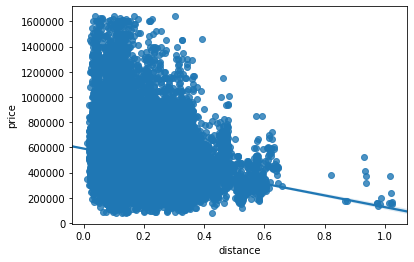

In [70]:
#feature engineering
#distance from city center
seattle = [47.6062, 122.3321]

#defining a column for distance from city center

distance_list = []
df_clean.reset_index(inplace = True)
for i in range(len(df_clean.lat)):
    lat_diff = abs(df_clean['lat'][i]) - abs(seattle[0])
    long_diff = abs(df_clean['long'][i]) - abs(seattle[1])
    lat_diff_sqr = lat_diff * lat_diff
    long_diff_sqr = long_diff * long_diff
    distance_sqr = lat_diff_sqr + long_diff_sqr
    distance = distance_sqr**0.5
    distance_list.append(distance)
distance_list
df_clean['distance'] = distance_list
sns.regplot(data = df_clean, x = 'distance', y = target)

In [69]:
engineered_model = model_maker(df_clean, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15'])
engineered_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1104.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:24:02   Log-Likelihood:            -2.6520e+05
No. Observations:               20511   AIC:                         5.306e+05
Df Residuals:                   20412   BIC:                         5.314e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.996e+07   4.46e+06      8.952      0.000    3.12e+07    4.87e+07
index             0.2079      0.117      1.785      0.074      -0.020       0.436
bedrooms      -3286.2784   1097.397     -2.995      0.003   -5437.265   -1135.292
bathrooms      2.289e+04   1767.860     12.946      0.000    1.94e+04    2.64e+04
sqft_living     132.9908      2.041     65.155      0.000     128.990     136.992
sqft_lot          0.6108      0.061      9.934      0.000       0.490       0.731
floors        -2.154e+04   2064.831    -10.434      0.000   -2.56e+04   -1.75e+04
waterfront     2.391e+05    1.4e+04     17.086      0.000    2.12e+05    2.67e+05
sqft_basement   -45.2069      2.517    -17.960      0.000     -50.141     -40.273
yr_built       -535.4725     41.122    -13.022      0.000    -616.075    -454.870
lat           -4.071e+04   4.26e+04     -0.955      0.340   -1.24e+05    4.29e+04
long            4.66e+05      5e+04      9.313      0.000    3.68e+05    5.64e+05
view_00        7.886e+06   8.93e+05      8.834      0.000    6.14e+06    9.64e+06
view_10        7.963e+06   8.93e+05      8.921      0.000    6.21e+06    9.71e+06
view_20        7.959e+06   8.93e+05      8.916      0.000    6.21e+06    9.71e+06
view_30        8.025e+06   8.93e+05      8.990      0.000    6.28e+06    9.77e+06
view_40        8.126e+06   8.93e+05      9.100      0.000    6.38e+06    9.88e+06
condition_1    7.917e+06   8.93e+05      8.868      0.000    6.17e+06    9.67e+06
condition_2    7.974e+06   8.93e+05      8.932      0.000    6.22e+06    9.72e+06
condition_3    7.999e+06   8.93e+05      8.960      0.000    6.25e+06    9.75e+06
condition_4    8.016e+06   8.93e+05      8.980      0.000    6.27e+06    9.77e+06
condition_5    8.052e+06   8.93e+05      9.020      0.000     6.3e+06     9.8e+06
grade_10       4.082e+06   4.47e+05      9.141      0.000    3.21e+06    4.96e+06
grade_11       4.188e+06   4.46e+05      9.380      0.000    3.31e+06    5.06e+06
grade_12       4.358e+06   4.47e+05      9.752      0.000    3.48e+06    5.23e+06
grade_13      -2.035e-07   2.28e-08     -8.945      0.000   -2.48e-07   -1.59e-07
grade_3        3.993e+06   4.56e+05      8.766      0.000     3.1e+06    4.89e+06
grade_4        3.868e+06   4.47e+05      8.659      0.000    2.99e+06    4.74e+06
grade_5        3.842e+06   4.46e+05      8.604      0.000    2.97e+06    4.72e+06
grade_6        3.847e+06   4.46e+05      8.616      0.000    2.97e+06    4.72e+06
grade_7        3.868e+06   4.47e+05      8.664      0.000    2.99e+06    4.74e+06
grade_8        3.912e+06   4.47e+05      8.760      0.000    3.04e+06    4.79e+06
grade_9        4.001e+06   4.47e+05      8.961      0.000    3.13e+06    4.88e+06
zipcode_98001  4.707e+05    6.7e+04      7.023      0.000    3.39e+05    6.02e+05
zipcode_98002  4.632e+05   6.51e+04      7.118   

By engineering a single additional feature, we have increased the R^2 of our model by .001, which may not seem like much at this time. However, feature engineering is a method that can be completed by machine learning algorithms, allowing us to add not just one feature, but a multitude of features that can be extrapolated from external data sources, as well as from the data available to us. From this, a method to find a more accurate model could be to apply machine learning to the model. 

# Section 5: Model Simplification

## Why Simplify?

It's important to remember that we are constructing this model for prospective home sellers, not for fellow data scientists. As such, we should craft a model that this audience can easily use and interpret by giving our potential sellers the option to include only a subset of columns that we have used thus far. Allowing them to use only a subset of the colums will make our model easier to use if these sellers do not have some column information readily available. 

We will take our model a step further and define a function to predict the seller's price in addition to giving model statistics. By providing a price immediately, our audience can get a quick answer to the question of price. 

## Model Construction

In [379]:
simple_model = model_maker(df_clean, drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'condition', 'grade'])

## Model Evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1134.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:35   Log-Likelihood:            -2.6532e+05
No. Observations:               20511   AIC:                         5.308e+05
Df Residuals:                   20416   BIC:                         5.316e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.013e+06   5.27e+04     19.228      0.000    9.09e+05    1.12e+06
bedrooms      -3318.4785   1103.900     -3.006      0.003   -5482.210   -1154.747
bathrooms      2.339e+04   1778.030     13.157      0.000    1.99e+04    2.69e+04
sqft_living     132.2612      2.053     64.436      0.000     128.238     136.284
sqft_lot          0.5651      0.061      9.210      0.000       0.445       0.685
floors        -2.027e+04   2072.814     -9.779      0.000   -2.43e+04   -1.62e+04
waterfront     2.344e+05   1.41e+04     16.663      0.000    2.07e+05    2.62e+05
sqft_basement   -43.8074      2.531    -17.312      0.000     -48.767     -38.847
yr_built       -568.4471     40.779    -13.940      0.000    -648.378    -488.516
view_00        9.713e+04    1.1e+04      8.826      0.000    7.56e+04    1.19e+05
view_10         1.75e+05   1.18e+04     14.812      0.000    1.52e+05    1.98e+05
view_20        1.704e+05   1.11e+04     15.370      0.000    1.49e+05    1.92e+05
view_30        2.363e+05   1.14e+04     20.684      0.000    2.14e+05    2.59e+05
view_40        3.337e+05   1.27e+04     26.246      0.000    3.09e+05    3.59e+05
condition_1    1.301e+05    1.9e+04      6.834      0.000    9.28e+04    1.67e+05
condition_2    1.852e+05   1.29e+04     14.334      0.000     1.6e+05    2.11e+05
condition_3    2.092e+05   1.15e+04     18.128      0.000    1.87e+05    2.32e+05
condition_4    2.261e+05   1.12e+04     20.229      0.000    2.04e+05    2.48e+05
condition_5    2.619e+05    1.1e+04     23.734      0.000     2.4e+05    2.84e+05
grade_10       1.884e+05   1.22e+04     15.468      0.000    1.65e+05    2.12e+05
grade_11        2.96e+05   1.36e+04     21.744      0.000    2.69e+05    3.23e+05
grade_12       4.642e+05   2.38e+04     19.472      0.000    4.17e+05    5.11e+05
grade_13       6.789e-11   9.02e-11      0.753      0.452   -1.09e-10    2.45e-10
grade_3        9.625e+04   9.16e+04      1.050      0.294   -8.34e+04    2.76e+05
grade_4       -2.664e+04   2.07e+04     -1.289      0.197   -6.71e+04    1.39e+04
grade_5       -5.607e+04   1.25e+04     -4.503      0.000   -8.05e+04   -3.17e+04
grade_6       -4.797e+04   1.13e+04     -4.256      0.000   -7.01e+04   -2.59e+04
grade_7        -2.62e+04   1.13e+04     -2.314      0.021   -4.84e+04   -4003.430
grade_8        1.739e+04   1.15e+04      1.513      0.130   -5139.037    3.99e+04
grade_9        1.072e+05   1.18e+04      9.110      0.000    8.41e+04     1.3e+05
zipcode_98001 -1.754e+05   5495.391    -31.912      0.000   -1.86e+05   -1.65e+05
zipcode_98002 -1.687e+05   7293.946    -23.126      0.000   -1.83e+05   -1.54e+05
zipcode_98003  -1.75e+05   6170.433    -28.366      0.000   -1.87e+05   -1.63e+05
zipcode_98004  4.462e+05   6753.097     66.074      0.000    4.33e+05    4.59e+05
zipcode_98005  1.576e+05   8231.493     19.146   

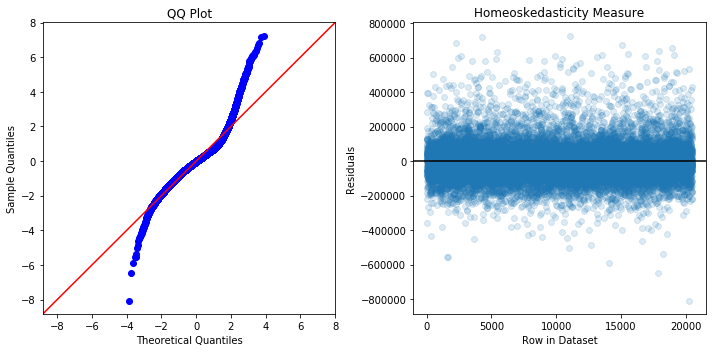

In [380]:
model_measures(simple_model)

In [390]:
# the goal of this section is to present a model that potential
# sellers can use, so lets define a function

# our potential sellers would provide us with a dataframe with
#what information they had available on their property.
#keys would be column names, values would be their property's 
#records
model_drop_cols = ['yrs_since_construction', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'condition', 'grade']
def price_predictor(df):
    
    
    df_provided = df
    unavailable_cols = []
    #dropping the columns our seller does not have
    
    for col in df_provided.columns:
        if col not in df_clean.columns:
            unavailable_cols.append(col)
            
    #constructing their model. We use df_clean so that our seller
    #doesn't have to work with logarithmic scales.
    
    seller_model = model_maker(df_clean, drop_cols = [*model_drop_cols, *unavailable_cols])
    
    #predicting their price
    
    prediction = seller_model.predict(df_provided)
    
    
    
    return prediction, model_measures(seller_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1133.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:38:16   Log-Likelihood:            -2.6552e+05
No. Observations:               20511   AIC:                         5.312e+05
Df Residuals:                   20418   BIC:                         5.320e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.141e+06   5.27e+04     21.651      0.000    1.04e+06    1.24e+06
bedrooms      -3794.9929   1112.946     -3.410      0.001   -5976.456   -1613.530
bathrooms      1.796e+04   1772.035     10.134      0.000    1.45e+04    2.14e+04
sqft_living     120.0969      1.866     64.376      0.000     116.440     123.754
floors        -4553.6604   1834.586     -2.482      0.013   -8149.596    -957.724
waterfront     2.333e+05   1.42e+04     16.425      0.000    2.05e+05    2.61e+05
yr_built       -661.4330     40.863    -16.187      0.000    -741.527    -581.339
view_00        1.272e+05    1.1e+04     11.565      0.000    1.06e+05    1.49e+05
view_10        2.005e+05   1.18e+04     16.926      0.000    1.77e+05    2.24e+05
view_20        1.973e+05   1.11e+04     17.775      0.000    1.76e+05    2.19e+05
view_30        2.591e+05   1.15e+04     22.611      0.000    2.37e+05    2.82e+05
view_40        3.567e+05   1.28e+04     27.950      0.000    3.32e+05    3.82e+05
condition_1    1.616e+05   1.91e+04      8.446      0.000    1.24e+05    1.99e+05
condition_2     2.13e+05    1.3e+04     16.443      0.000    1.88e+05    2.38e+05
condition_3    2.338e+05   1.16e+04     20.190      0.000    2.11e+05    2.56e+05
condition_4    2.496e+05   1.12e+04     22.266      0.000    2.28e+05    2.72e+05
condition_5    2.829e+05   1.11e+04     25.528      0.000    2.61e+05    3.05e+05
grade_10       2.125e+05   1.22e+04     17.374      0.000    1.89e+05    2.36e+05
grade_11       3.301e+05   1.36e+04     24.215      0.000    3.03e+05    3.57e+05
grade_12        5.14e+05   2.39e+04     21.478      0.000    4.67e+05    5.61e+05
grade_13      -9.706e-11   1.91e-10     -0.507      0.612   -4.72e-10    2.78e-10
grade_3         8.15e+04   9.25e+04      0.881      0.378   -9.98e+04    2.63e+05
grade_4       -2.904e+04   2.09e+04     -1.393      0.164   -6.99e+04    1.18e+04
grade_5       -5.348e+04   1.26e+04     -4.258      0.000   -7.81e+04   -2.89e+04
grade_6       -4.336e+04   1.14e+04     -3.813      0.000   -6.56e+04   -2.11e+04
grade_7       -2.128e+04   1.14e+04     -1.864      0.062   -4.37e+04    1102.897
grade_8        2.541e+04   1.16e+04      2.193      0.028    2701.446    4.81e+04
grade_9        1.245e+05   1.18e+04     10.507      0.000    1.01e+05    1.48e+05
zipcode_98001 -1.671e+05   5531.260    -30.203      0.000   -1.78e+05   -1.56e+05
zipcode_98002  -1.63e+05   7352.513    -22.166      0.000   -1.77e+05   -1.49e+05
zipcode_98003 -1.699e+05   6222.789    -27.297      0.000   -1.82e+05   -1.58e+05
zipcode_98004  4.468e+05   6816.752     65.538      0.000    4.33e+05     4.6e+05
zipcode_98005  1.628e+05   8304.243     19.607      0.000    1.47e+05    1.79e+05
zipcode_98006  9.829e+04   5112.270     19.226      0.000    8.83e+04    1.08e+05
zipcode_98007  8.213e+04   8735.334      9.402   

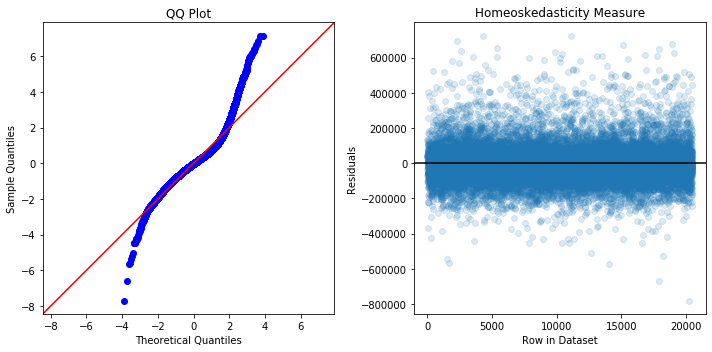

4326    283618.74189
dtype: float64
4326    330000.0
Name: price, dtype: float64


In [401]:
sample_seller = df_clean.sample(n=1)
sample_seller
prediction, summary = price_predictor(sample_seller)
print(prediction)
print(sample_seller['price'])

Our seller is provided with all of the information that they could need. They are immediately given a prediction for the price of their home, as well as a summary of the model that was constructed based on the information they had available. By opting to use outlier removed data only, we allowed our model to have easily interpretable coefficients that could easily be provided to our prospective seller. 

# Section 6: Additional Considerations

## An investigation on Anchoring
A major assumption made when constructing any kind of model is the assumption of rationality. We are assuming that this data was collected on completely rational homebuyers, but we know that no person is 100% rational. A way to identify irrationality in data is by looking at possible anchors. An 'anchor' is a behavioral economics term that means a basis point for your decision making. For example, if you were shopping, and saw a t-shirt for 1200 dollars, then another for 100 dollars, you would view the second shirt as 'cheap'. If you had seen the latter shirt only, you wouldn't have thought of it as cheap, because you'd have not seen the 1200 price tag before to 'anchor' your decision making. 

So how may anchoring affect home prices? 

For our dataset, we will identify rows that may have been anchored by their nearest neighbors homes' square footage. We would expect that a home that has a lower square footage than the nearest neighbors would have a lower value than a home that has the same square footage, but higher than their neighbors square footage. So, as the relative square footage increases, the price will increase as well. 

Text(0.5, 1.0, 'Relative Square Footage V Price')

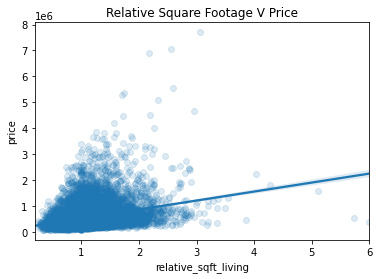

In [61]:
# we need to calculate the relative square footage of the properties, calculated as sqft_living/sqft_living15. 

df['relative_sqft_living'] = df['sqft_living'] / df['sqft_living15']

# and visualize the relationship between relative square footage versus price

a = sns.regplot(data = df, x = 'relative_sqft_living', y = target, scatter_kws={'alpha':0.15})
a.set_title('Relative Square Footage V Price')


#### Interpretations:
- As the relative square footage increases, price increases. This supports our initial thoughts that relative square footage plays a role in the price. 

In [62]:
# we should also compare how the prices of similarly sized homes differ whether they are larger or smaller than 
# their neighbors. 

higher = []
for i in range(len(df['relative_sqft_living'])):
    higher.append(df['relative_sqft_living'][i] > 1)
df['higher'] = higher
        

In [63]:
#df['higher']

In [64]:
df_higher = df.copy()
df_lower = df.copy()

df_higher = df_higher.where(df['higher'] == True)
df_lower = df_lower.where(df['higher'] != True)

df_higher = df_higher.dropna(axis = 0)
df_lower = df_lower.dropna(axis = 0)

#df_higher


In [65]:
#df_lower

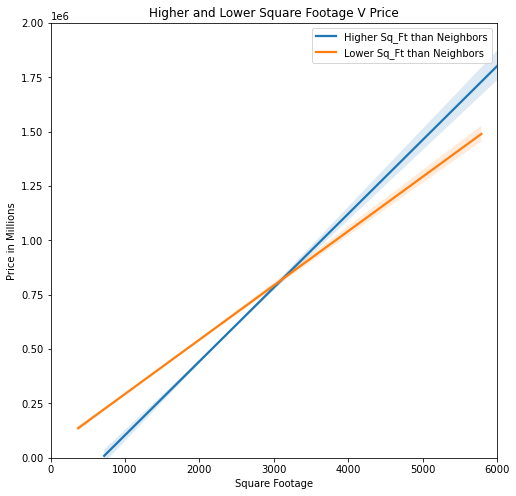

In [66]:
plots = [df_higher, df_lower]

fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (8, 8))
legend = ['Higher Sq_Ft than Neighbors', "Lower Sq_Ft than Neighbors"]
for i, df in enumerate(plots):
    a = sns.regplot(data = df, x = df['sqft_living'], y = target, scatter = False, label = 'full')
    a.set_xlim(0, 6000)
    a.set_ylim(0, 2000000)
    a.set_title('Higher and Lower Square Footage V Price')
    a.set_ylabel('Price in Millions')
    a.set_xlabel('Square Footage')
    plt.legend(legend)

#### Interpretations:
- As the square footage of a home increases, so does its price, both for homes that are smaller than their neighbors and homes that are larger than their neighbors. 
- A home surrounded by larger homes would outsell a home of equal size when in a neighborhood with smaller homes, when the home is below 3000 sqft.
- When the home is above 3000 sqft, a relatively larger home would outsell a relatively smaller home. 
- For prospective home sellers, they should see if their home's square footage is greather than 3000. If it is greater than 3000, these homeowners would want their home to be relatively larger. If less than 3000, they would want a relatively smaller home compared to neighbors. 
- Homes less than 3000 sqft experience a price increase when surrounded by larger homes, because potential buyers are anchored to larger neighbors, overestimating the size of their own home. 
- Conversely, homes that are larger than 3000 feet experience a price increase when they are larger than their neighbors. Again, homebuyers are anchored to their neighbors home sizes, but the fact that the home is relatively larger inflates the price. 

## An investigation on Home Density

Many prospective homeowners and sellers alike worry about the density of their home in relation to others. Whether a home is secluded or not may drastically affect price, but how much would it affect price in our data?


In [67]:
# first we should count the number of homes in each zipcode. 
df_density = pd.DataFrame(df['zipcode'].value_counts())
df_density = df_density.reset_index()
df_density = df_density.rename(columns = {'index' : 'zipcode', 'zipcode' : 'No. of Homes'})
df_density = df_density.sort_values(by = ['zipcode'])
df_density

tuples = pd.DataFrame(df.groupby('zipcode')['price'].mean())
tuples = tuples.reset_index()
df_density['Average Home Price'] = tuples['price']
    




Text(0.5, 1.0, 'Average Home Price V Home Density')

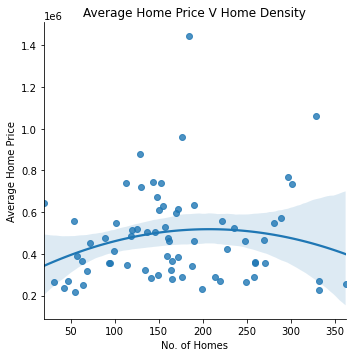

In [68]:

sns.lmplot(data = df_density, x ='No. of Homes', y ='Average Home Price', order = 2)
ax = plt.gca()
ax.set_title('Average Home Price V Home Density')

#### Interpretations
- Interestingly, there is no clear direct linear relationship between Average Price and Number of Homes. 
- This may be because as the density of homes increases, the average size of these homes would decrease, since there is less room. The smaller houses therefore cost less.
- Additionally, homes that are distant from neighbors may experience a price drop due to the sheer remoteness of their area. 

## An investigation on Renovations
How recent does a renovation have to be to have a large effect upon a home's sale price? This investigation will help prospective home sellers decide if they should remodel before a sale, or leave their home as is. 

Text(-15.450000000000003, 0.5, 'Average Price')

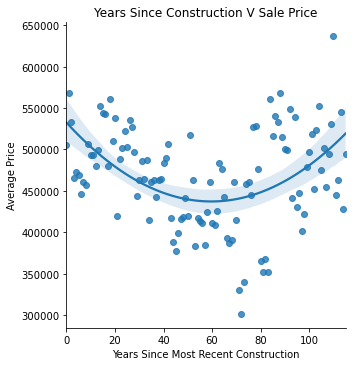

In [69]:
# We will be visualizing the average sale price of a home, grouped
# by the number of years since the home was renovated.

df_renovations = pd.DataFrame()

tuples = pd.DataFrame(df.groupby('yrs_since_construction')['price'].mean())
tuples = tuples.reset_index()
sns.lmplot(data = tuples, x = 'yrs_since_construction', y = target, order = 2)
ax = plt.gca()
ax.set_title('Years Since Construction V Sale Price')
ax.set_xlabel('Years Since Most Recent Construction')
ax.set_ylabel('Average Price')

#### Interpretations
- There is not a directly linear relationship between home price and recent construction. Instead, there is a parabolic relationship, which suggests that there is a point at which home prices increase in value as they age. This appears to be 60 years. 
- For prospective home sellers, this gives them a clear indication of when their home would be most valuable depending on the time since construction took place. If these homesellers have an antique home, they would not want to renovate it, as antique homes sell for a similar price as recently renovated homes.
- Conversely, if the home has not been renovated in 60 years, the point at which home value begins to increase, the homeowners need to decide whether to renovate and sell for maximum profit, sell at a discount due to the lack of a recent home renovation. 

In [199]:
df_pvals = pd.DataFrame(transformed_model.pvalues)
df_drops = pd.DataFrame(df_pvals[0] > 0.05w

- Non-Tech presentation take tech stuff out DONE GOOD JOB BOI
- feature engineering
- ranking
